In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.stats import gaussian_kde

In [2]:
### Graphics parameters:
# ----------------------
size=19
params = {'legend.fontsize': 12,
          'axes.labelsize': 17,
          'axes.titlesize': size,
          'xtick.labelsize': 20*0.75,
          'ytick.labelsize': 20*0.75,
          'figure.figsize': (13*0.65,8.5*0.65),
#           'figure.figsize': plt.rcParamsOrig['figure.figsize'],
          'axes.titlepad': 10,
          'axes.facecolor':'gainsboro'}
plt.rcParams.update(params)

In [3]:
# Load information:
# -----------------
validation = pd.read_csv("validation.log.csv", sep="\t")
tcga_1 = pd.read_csv("breast.log.csv", sep="\t")
tcga_2 = pd.read_csv("kidney.log.csv", sep="\t")
tcga_3 = pd.read_csv("bronchus-lung.log.csv", sep="\t")

In [4]:
# Times from validation:
# ----------------------
sser   = validation[validation['N° variables']==2072]['Time'].to_list() # S. serevisiae
sstip  = validation[validation['N° variables']==1621]['Time'].to_list() # S. stipitis
ylip   = validation[validation['N° variables']==2649]['Time'].to_list() # Y. lipolytica
ecoli  = validation[validation['N° variables']==3209]['Time'].to_list() # E. coli
bsubt  = validation[validation['N° variables']==1589]['Time'].to_list() # B. subtilis
bsubt += validation[validation['N° variables']==1590]['Time'].to_list() # B. subtilis

# Times from tcga:
# ----------------
tcga = tcga_1['Time'].to_list() + tcga_2['Time'].to_list() + tcga_3['Time'].to_list() # tcga

# Number of variables corresponding to each metabolic model:
# ----------------------------------------------------------
varsorg = {'sser':'2072', 
           'sstip':'1621',
           'ylip':'2649',
           'ecoli':'3209',
           'bsubt':'1589',
           'tcga':'14321'}

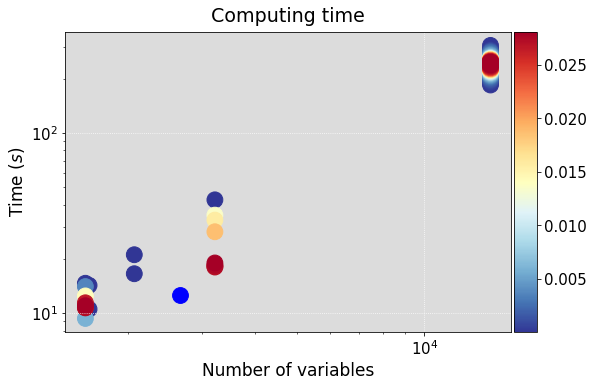

In [5]:
### Figure 6:
# -----------
cmap='RdYlBu_r'

fig, ax = plt.subplots()
for data in ['sser','sstip','ylip','ecoli','bsubt','tcga']:
    y = np.array(eval(data))
    x = [float(varsorg[data])]*len(y)
    
    if data == 'ylip':
        s = ax.scatter(x, y,c='b', s=250)
    
    else:
        # Calculate the point density
        z = gaussian_kde(y)(y)
        
        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        z, y = z[idx], y[idx]
        
        s = ax.scatter(x, y, c=z, cmap=cmap, s=250)

plt.xlabel("Number of variables")
plt.ylabel("Time ($s$)")
plt.title("Computing time")

plt.grid(color='white',linestyle='dotted')

plt.yscale('log')
plt.xscale('log')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(s, ax=ax, cax=cax, orientation="vertical")

plt.show()